In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
train_original = train.copy()
test_original = test.copy()

# dataset structure

In [4]:
print(train.columns)
print(test.columns)

Index(['ID', 'Datetime', 'Count'], dtype='object')
Index(['ID', 'Datetime'], dtype='object')


In [5]:
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [6]:
print(train.shape)
print(test.shape)

(18288, 3)
(5112, 2)


# Feature Extraction

In [7]:
train['Datetime']=pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')

In [8]:
test['Datetime']=pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
train_original['Datetime']=pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')
test_original['Datetime']=pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M')

In [9]:
#extracting year, month, day, hour
for i in (train, test, train_original, test_original):
    i['year']=i.Datetime.dt.year
    i['month']=i.Datetime.dt.month
    i['day']=i.Datetime.dt.day
    i['hour']=i.Datetime.dt.hour

In [10]:
# weekend feature
train['day of week']=train['Datetime'].dt.dayofweek

In [11]:
def fun(day):
    if day.dayofweek == 5 or day.dayofweek == 6:
        return 1
    else:
        return 0
temp = train['Datetime'].apply(fun)        

In [12]:
train['weekend']=temp
train.head()

,ID,Datetime,Count,year,month,day,hour,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


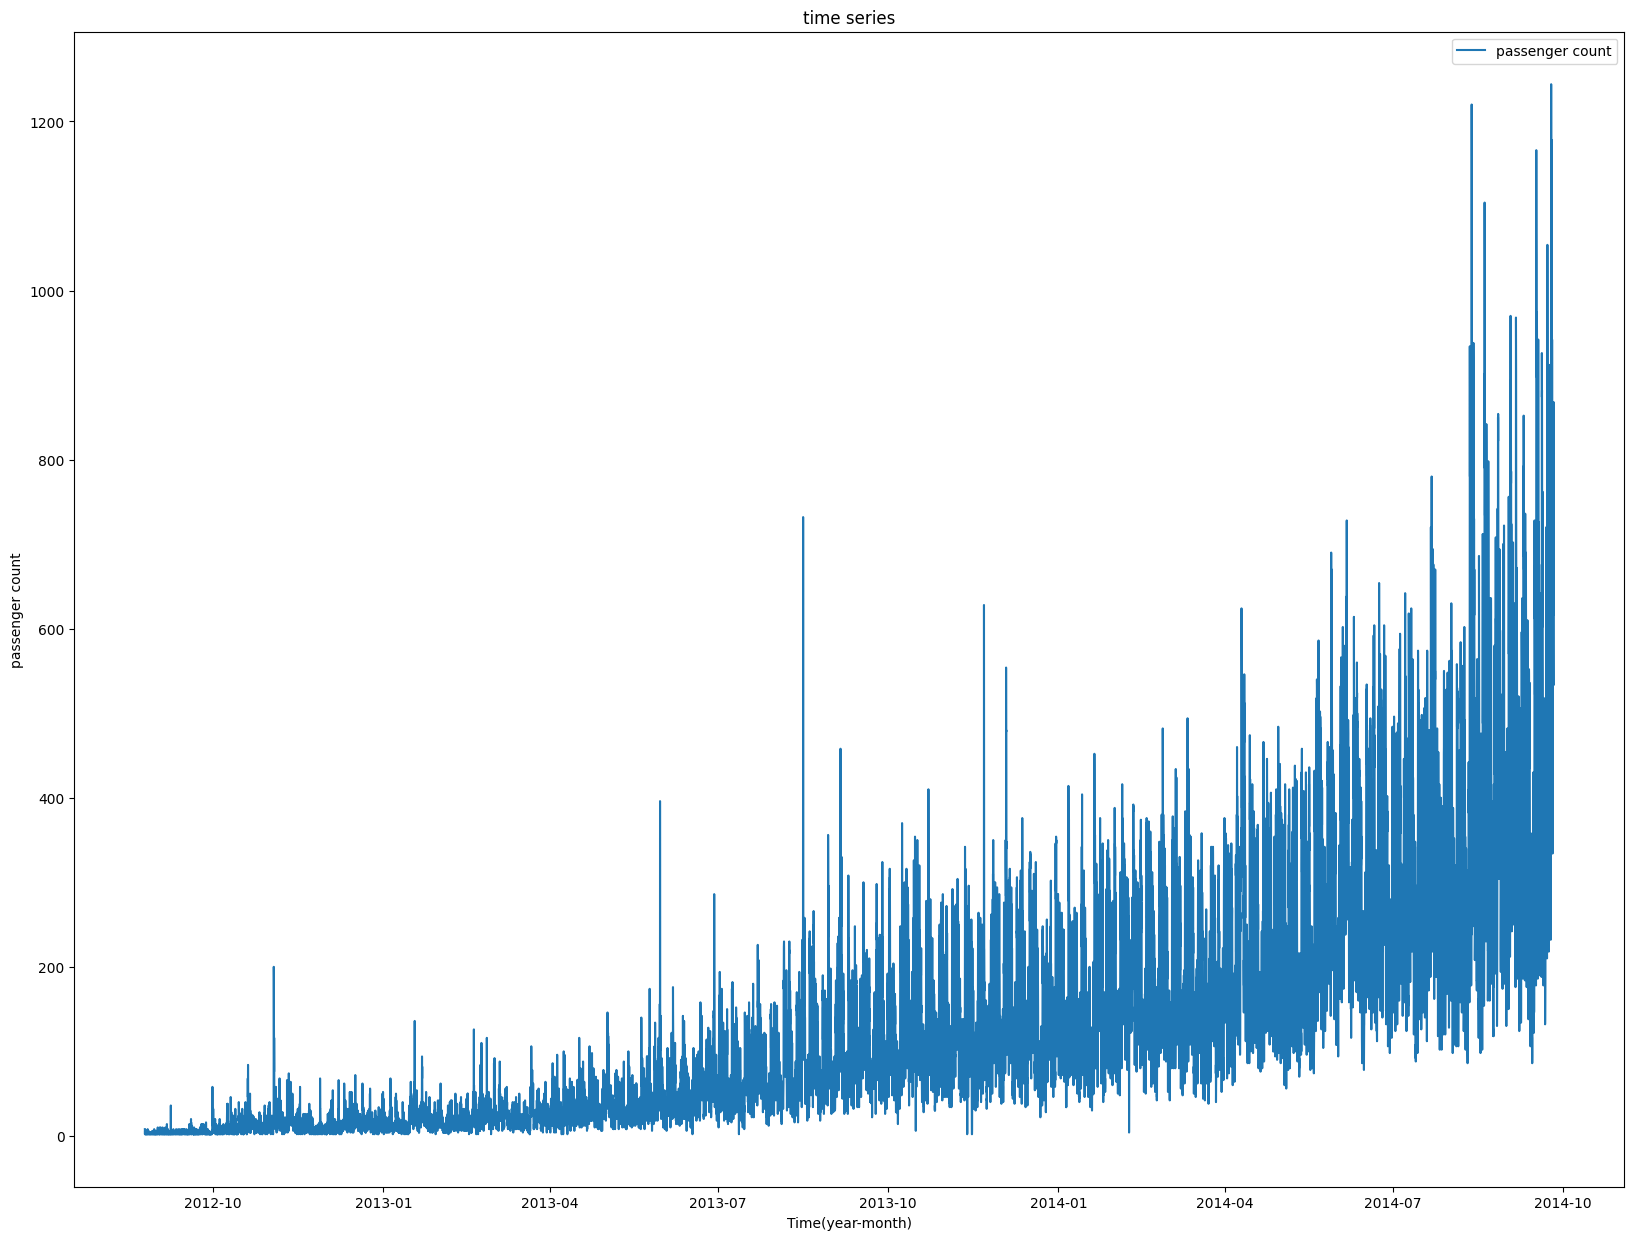

In [13]:
train.index = train['Datetime']
df = train.drop('ID',axis=1)
ts=df['Count']
plt.figure(figsize=(20,15))
plt.plot(ts,label='passenger count')
plt.title('time series')
plt.xlabel('Time(year-month)')
plt.ylabel('passenger count')
plt.legend(loc='best')

# Analysis

<Axes: xlabel='year'>

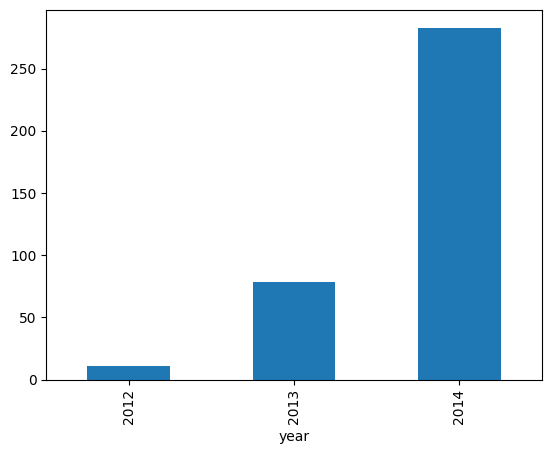

In [14]:
train.groupby('year')['Count'].mean().plot.bar()

<Axes: xlabel='month'>

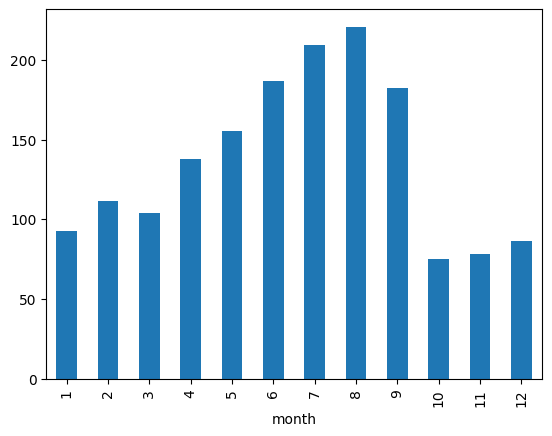

In [15]:
train.groupby('month')['Count'].mean().plot.bar()

<Axes: xlabel='year,month'>

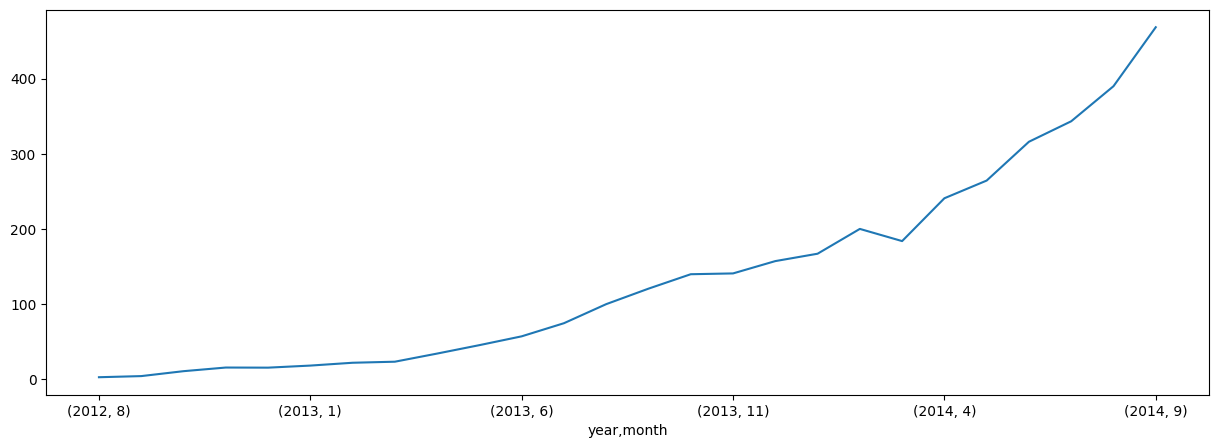

In [16]:
a=train.groupby(['year','month'])['Count'].mean()
a.plot(figsize=(15,5))

<Axes: xlabel='hour'>

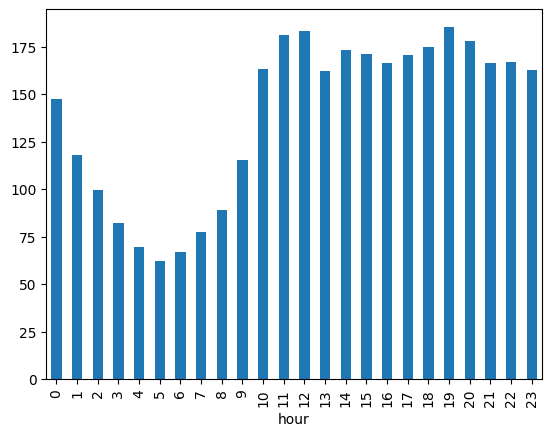

In [17]:
train.groupby('hour')['Count'].mean().plot.bar()

<Axes: xlabel='weekend'>

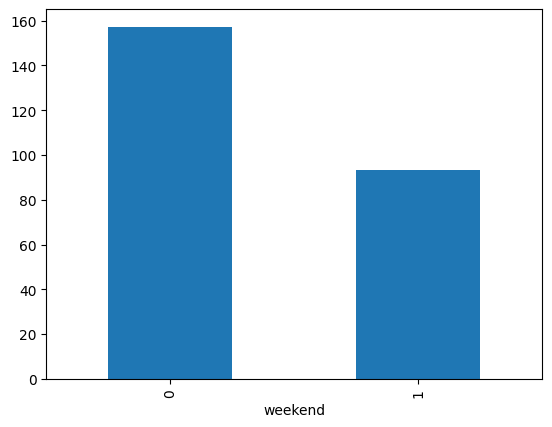

In [18]:
train.groupby('weekend')['Count'].mean().plot.bar()

<Axes: xlabel='day of week'>

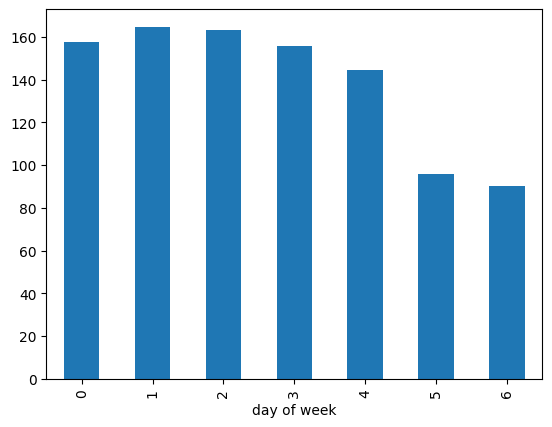

In [19]:
train.groupby('day of week')['Count'].mean().plot.bar()

# Modelling

In [20]:
train = train.drop('ID',axis=1)

In [21]:
train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index=train.Timestamp

C:\Users\Swetha Pooduru\AppData\Local\Temp\ipykernel_24392\39091418.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')


In [22]:
train

,Datetime,Count,year,month,day,hour,day of week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1
...,...,...,...,...,...,...,...,...
2014-09-25 19:00:00,2014-09-25 19:00:00,868,2014,9,25,19,3,0
2014-09-25 20:00:00,2014-09-25 20:00:00,732,2014,9,25,20,3,0
2014-09-25 21:00:00,2014-09-25 21:00:00,702,2014,9,25,21,3,0


In [23]:
#splitting
Train = train.loc['2012-08-25':'2014-06-24']
valid=train.loc['2014-06-25':'2014-09-25']

<Axes: xlabel='Datetime'>

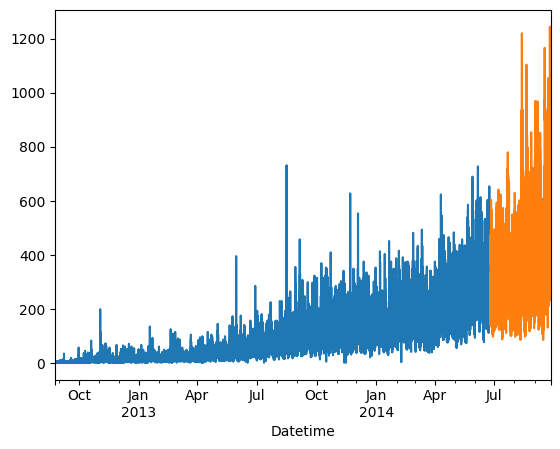

In [24]:
Train.Count.plot(label='train')
valid.Count.plot(label='valid')


In [25]:
Train.to_csv('train_set',index=False)

In [26]:
valid.to_csv('validation_set',index=False)

# Stationarity check

results of dickey-fuller test
Test Statistic             -4.456561
p-value                     0.000235
lags used                  45.000000
no.of obsrvtns          18242.000000
Critical Value (1%)        -3.430709
Critical Value (5%)        -2.861698
Critical Value (10%)       -2.566854
dtype: float64


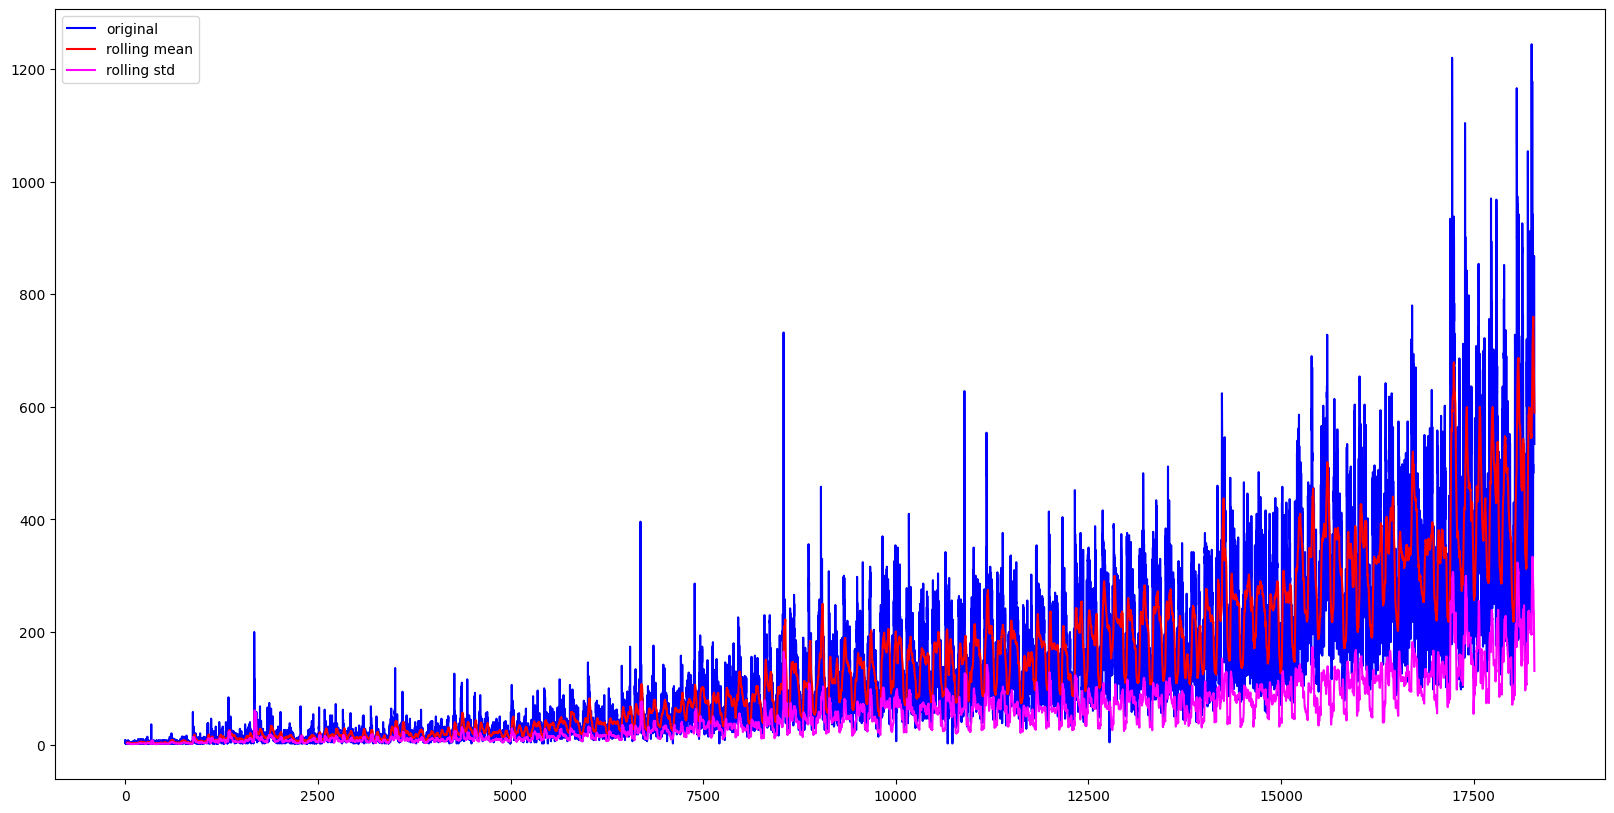

In [30]:
# augmented dickey fuller test
from statsmodels.tsa.stattools import adfuller

def test(ts):
    rolmean = ts.rolling(24).mean()
    rolstd = ts.rolling(24).std()
    orig = plt.plot(ts,color='blue',label='original')
    mean = plt.plot(rolmean, color = 'red', label='rolling mean')
    std = plt.plot(rolstd,color='magenta', label='rolling std')
    plt.legend(loc='best')

    print('results of dickey-fuller test')
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','lags used','no.of obsrvtns'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print(dfoutput)

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

test(train_original['Count'])

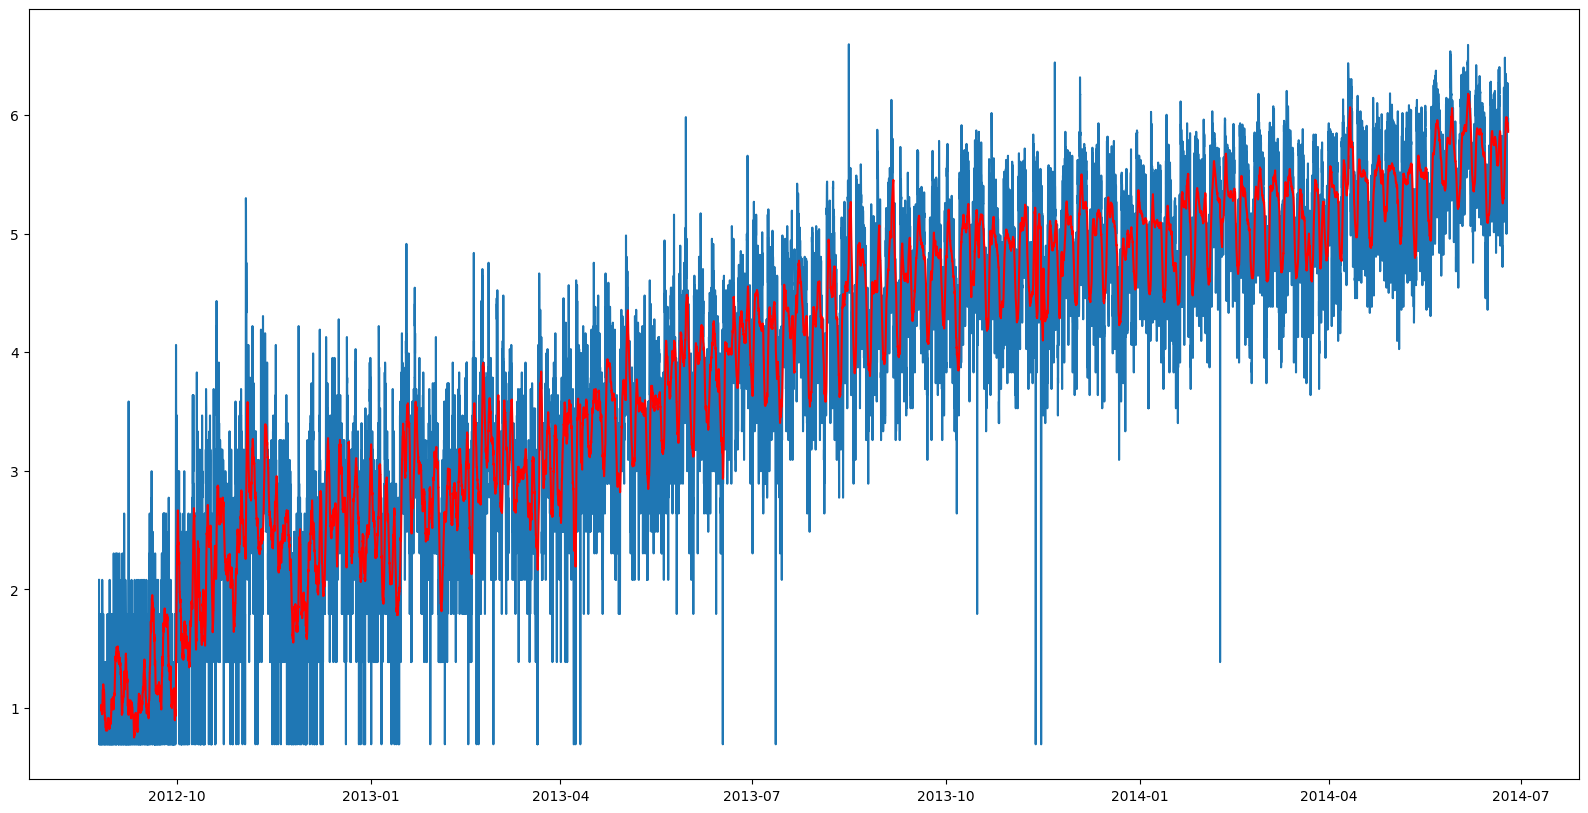

In [32]:
#removing trends
Train_log = np.log(Train['Count'])
valid_log = np.log(valid['Count'])

moving_avg = Train_log.rolling(window=24).mean()
plt.plot(Train_log)
plt.plot(moving_avg, color = 'red')
plt.show()

results of dickey-fuller test
Test Statistic            -22.470949
p-value                     0.000000
lags used                  43.000000
no.of obsrvtns          15989.000000
Critical Value (1%)        -3.430759
Critical Value (5%)        -2.861721
Critical Value (10%)       -2.566866
dtype: float64


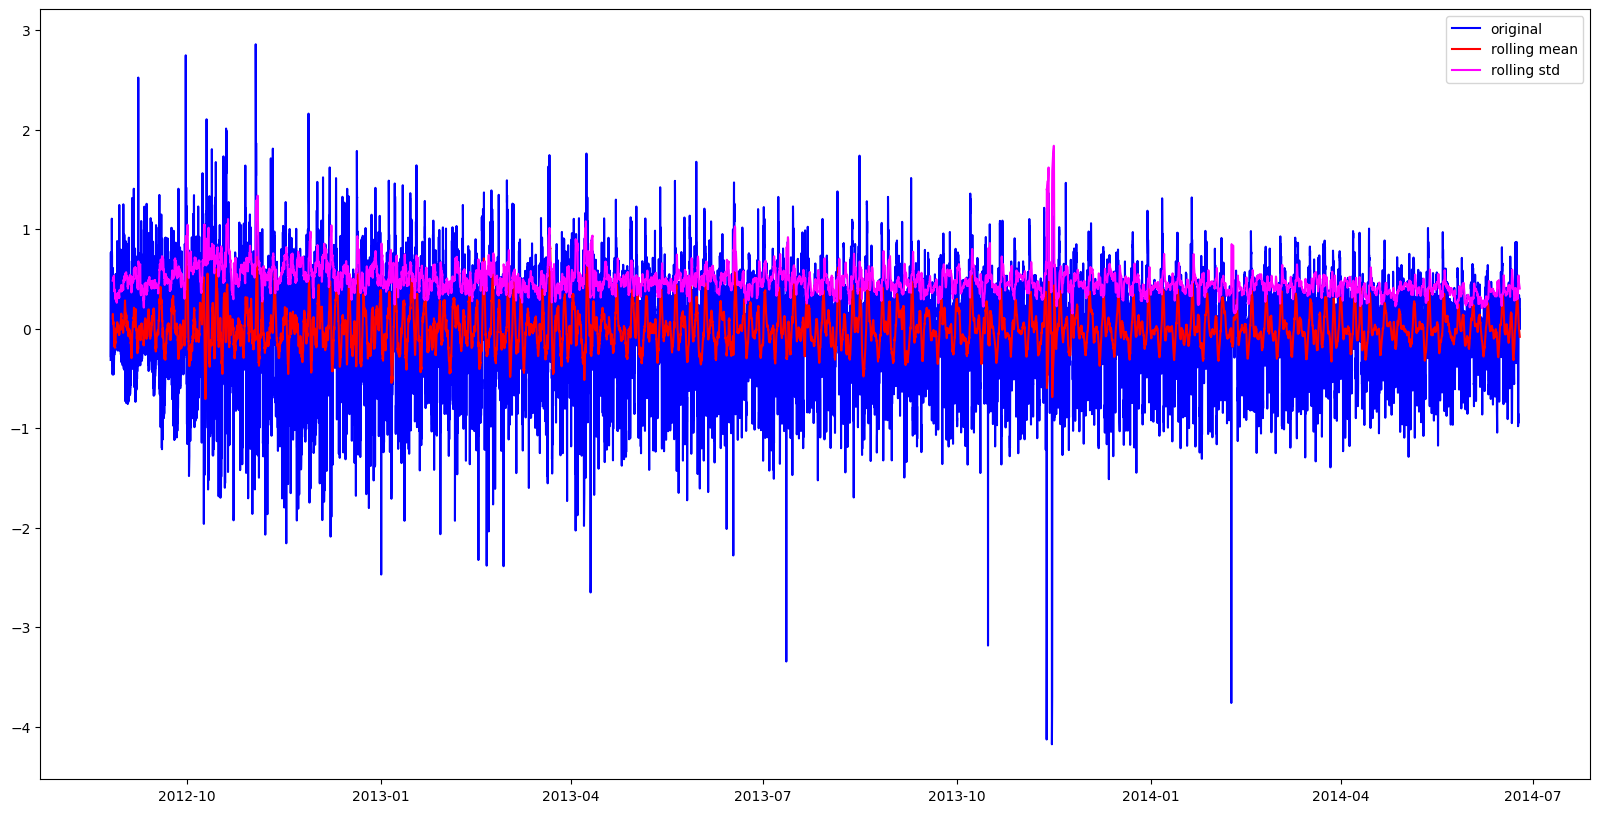

In [33]:
train_log_moving_avg_diff = Train_log - moving_avg
train_log_moving_avg_diff.dropna(inplace=True)
test(train_log_moving_avg_diff)

trend is almost removed. lets stabilize the mean

results of dickey-fuller test
Test Statistic            -28.579381
p-value                     0.000000
lags used                  43.000000
no.of obsrvtns          16011.000000
Critical Value (1%)        -3.430758
Critical Value (5%)        -2.861721
Critical Value (10%)       -2.566866
dtype: float64


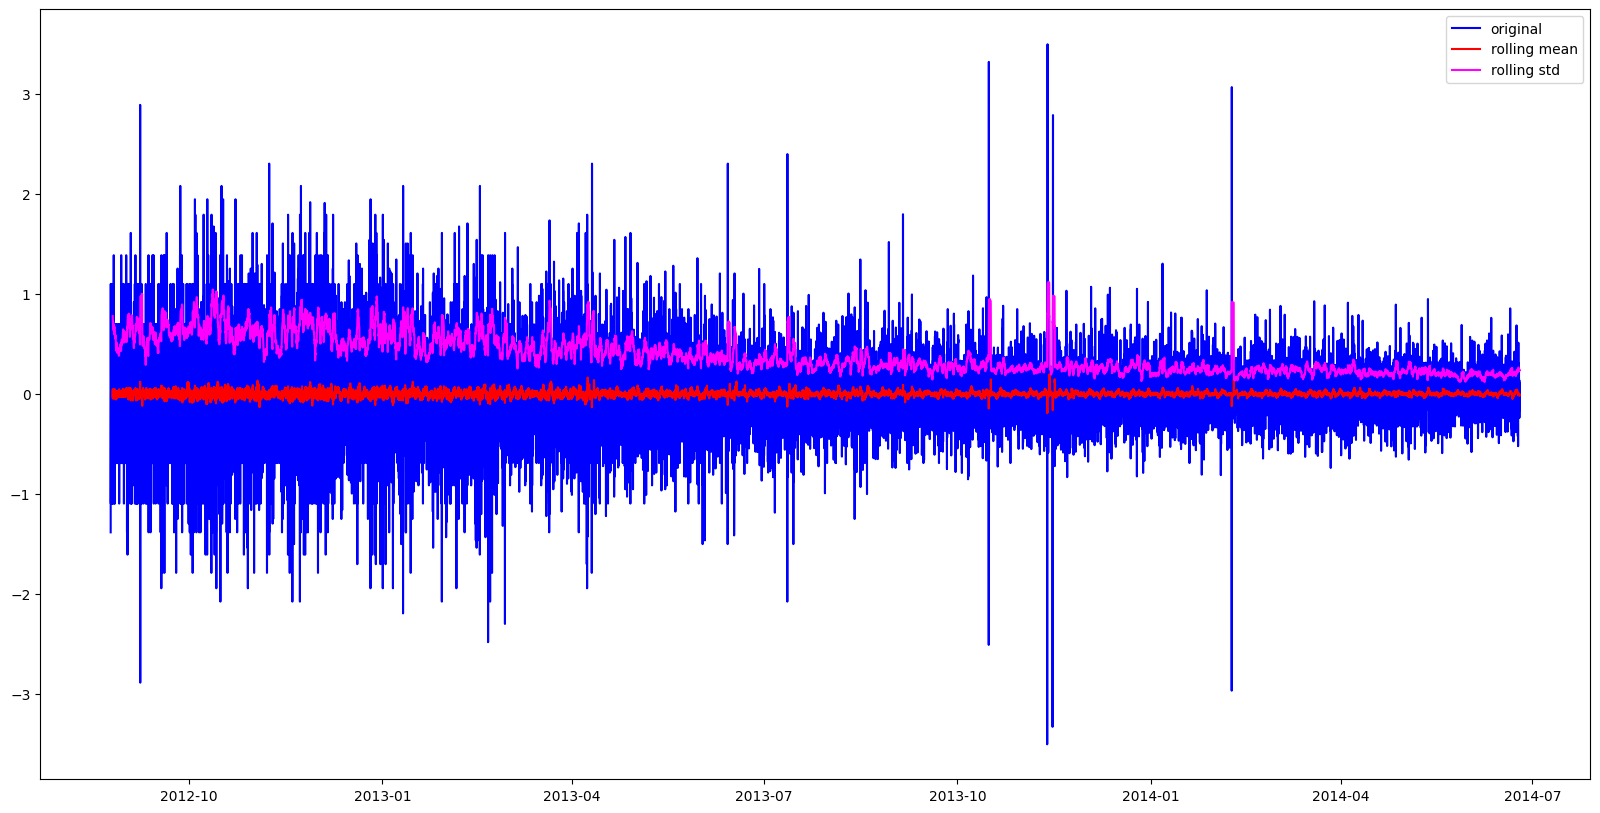

In [35]:
train_log_diff = Train_log - Train_log.shift(1)
test(train_log_diff.dropna())

In [36]:
#seasonal decompose to decompose the time series into trend, seasonality and residuals

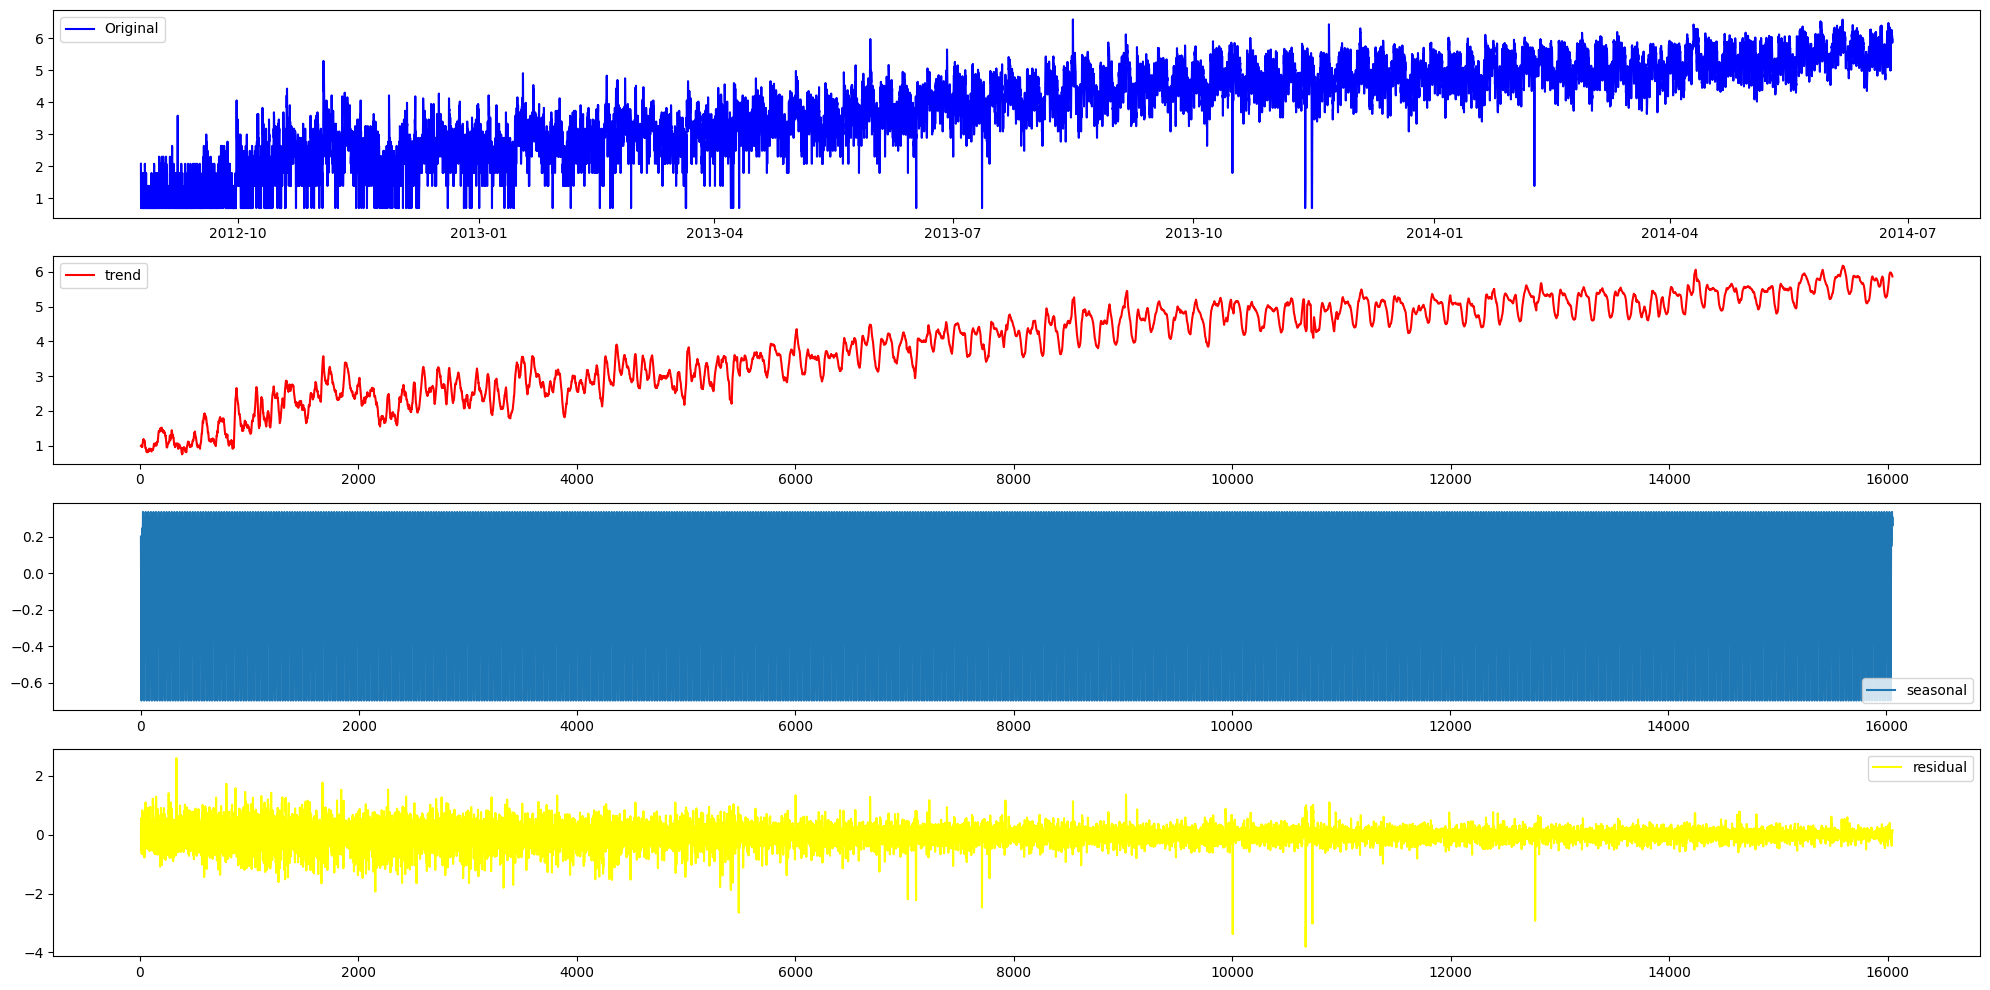

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, period=24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Train_log, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='trend', color='red')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='residual', color='yellow')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

results of dickey-fuller test
Test Statistic            -31.326116
p-value                     0.000000
lags used                  43.000000
no.of obsrvtns          15988.000000
Critical Value (1%)        -3.430759
Critical Value (5%)        -2.861721
Critical Value (10%)       -2.566866
dtype: float64


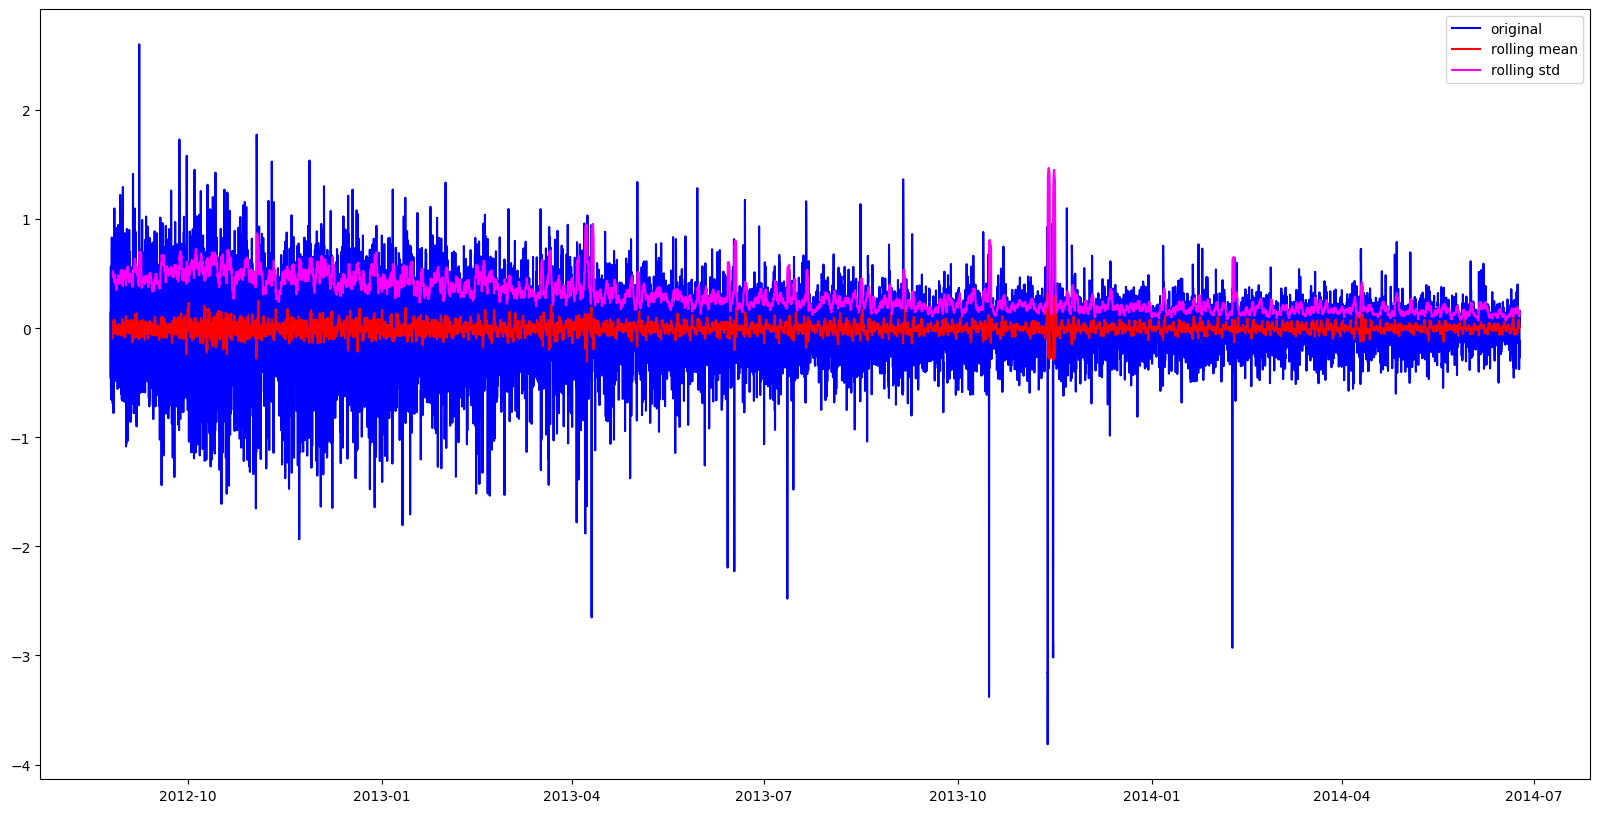

In [41]:
# lets work with residuals
#stationarity check

train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace = True)
test(train_log_decompose[0])

# Forecasting

In [42]:
#findng optimal parameters

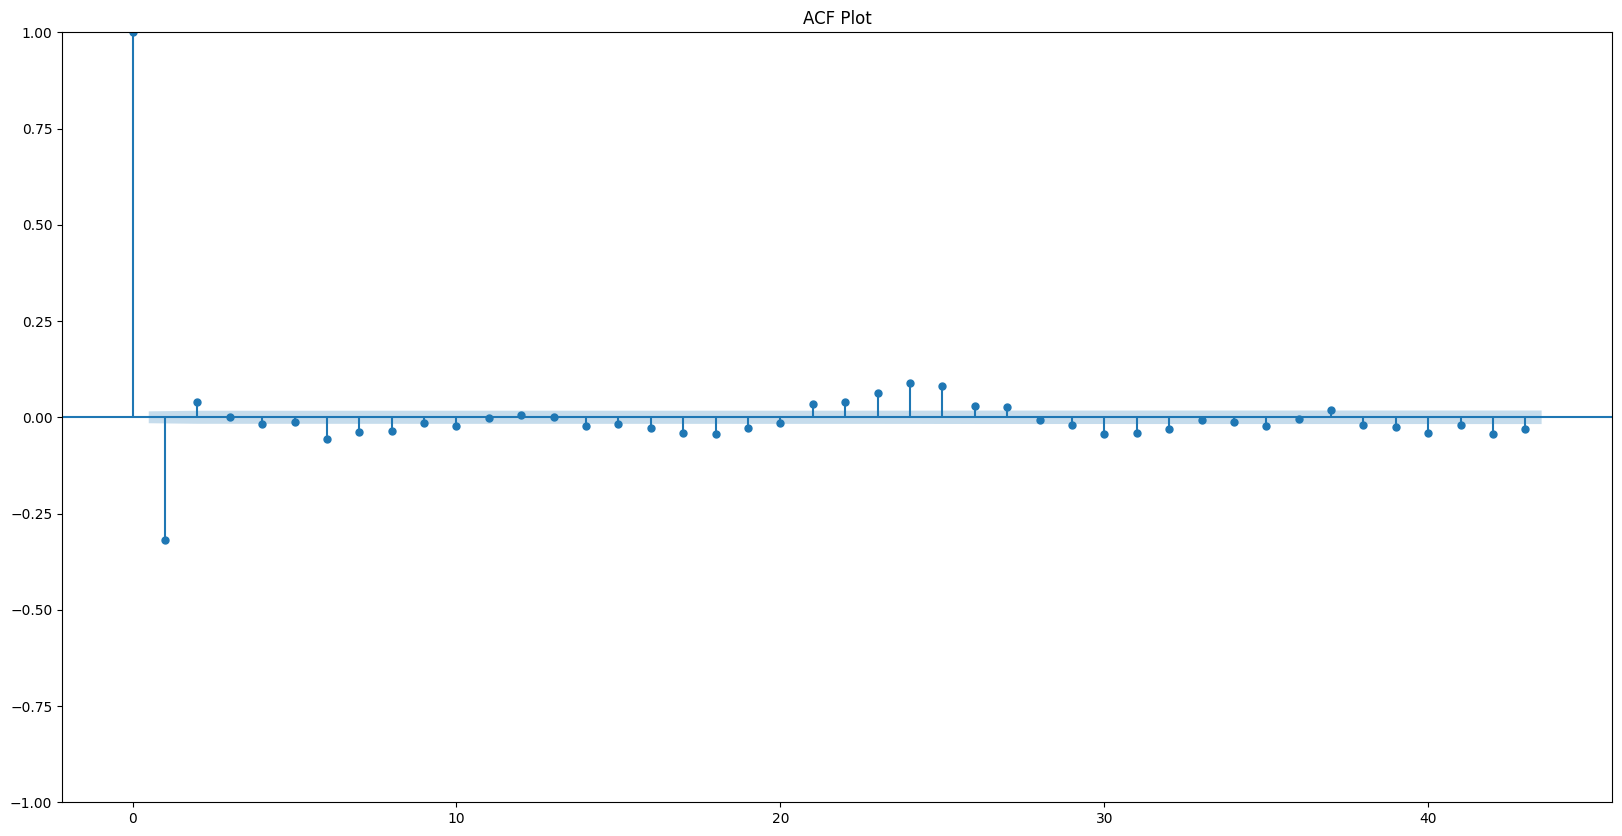

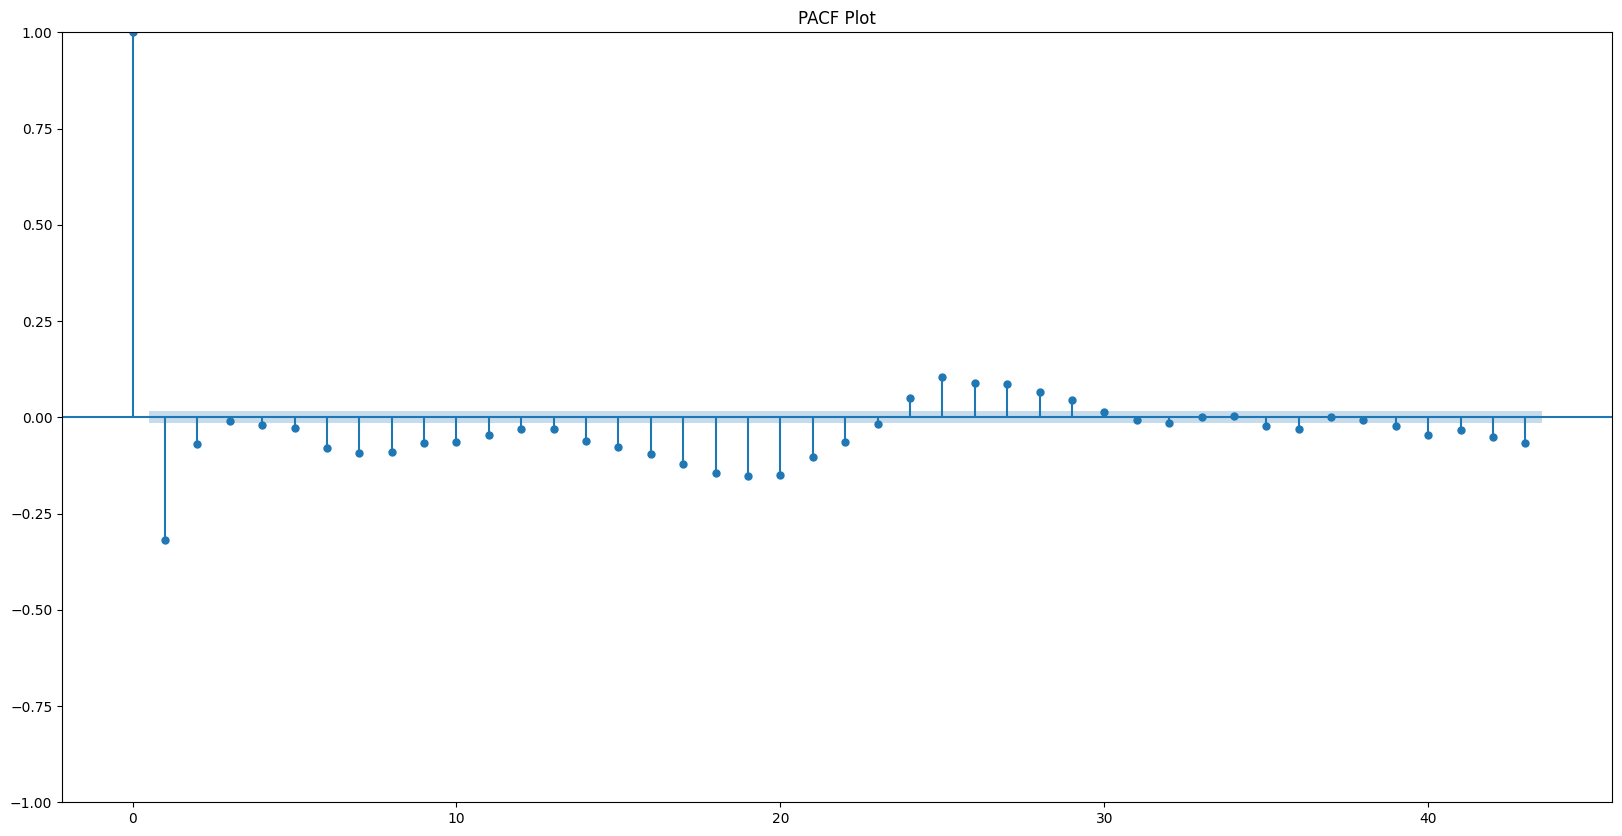

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(train_log_diff.dropna())
plt.title('ACF Plot')
plt.show()

plot_pacf(train_log_diff.dropna())
plt.title('PACF Plot')
plt.show()

In [44]:
# so q=2, p=2,d=1

C:\Users\Swetha Pooduru\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Swetha Pooduru\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Swetha Pooduru\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


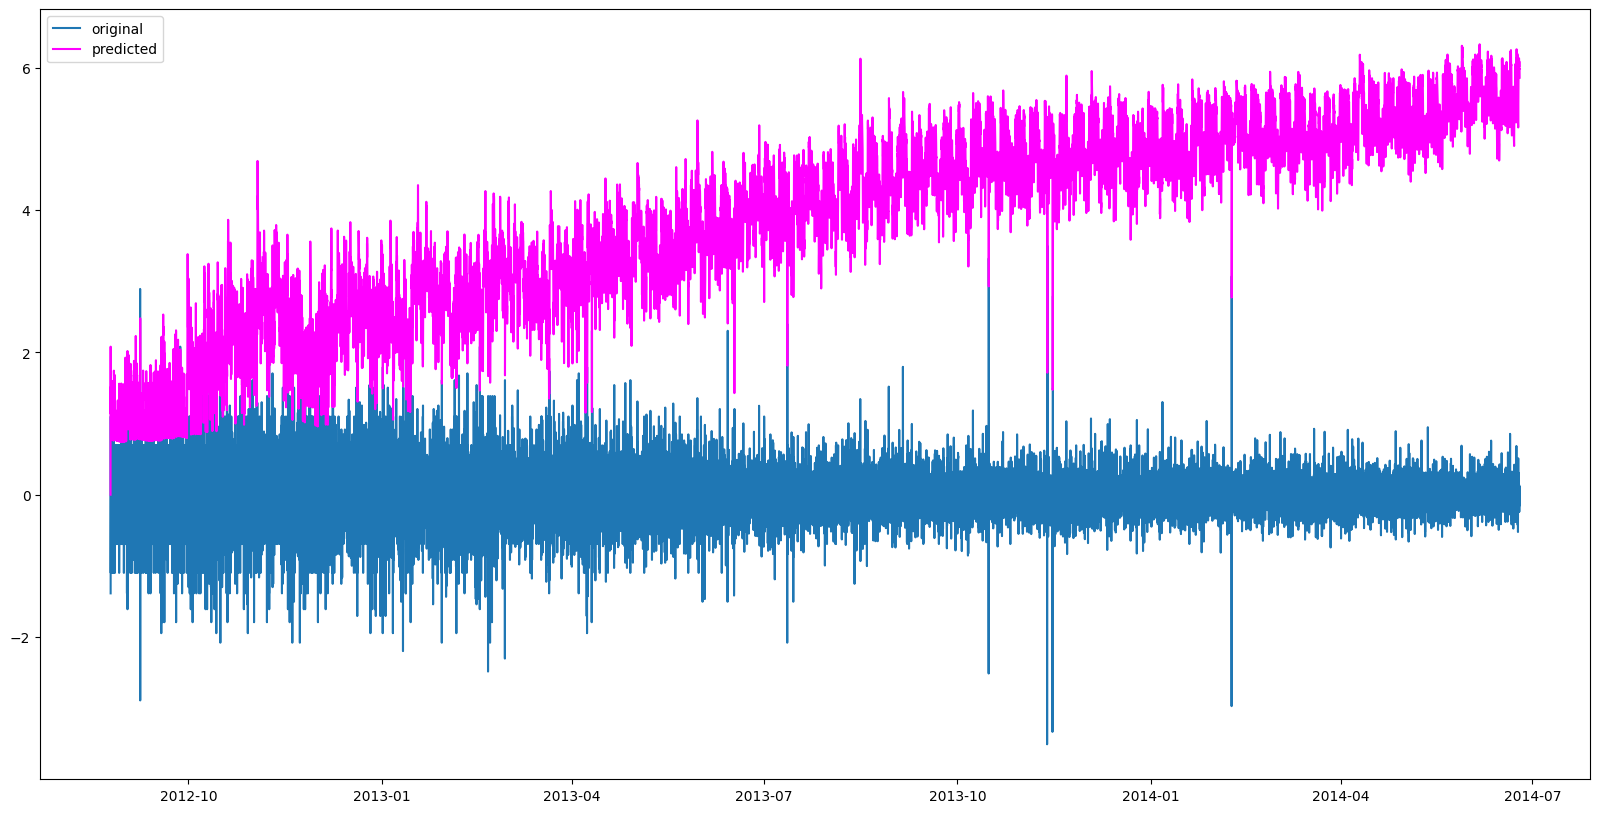

In [47]:
#ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(Train_log, order=(2,1,2))
results = model.fit()
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results.fittedvalues, color='magenta', label='predicted')
plt.legend(loc='best')
plt.show()

C:\Users\Swetha Pooduru\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Swetha Pooduru\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Swetha Pooduru\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


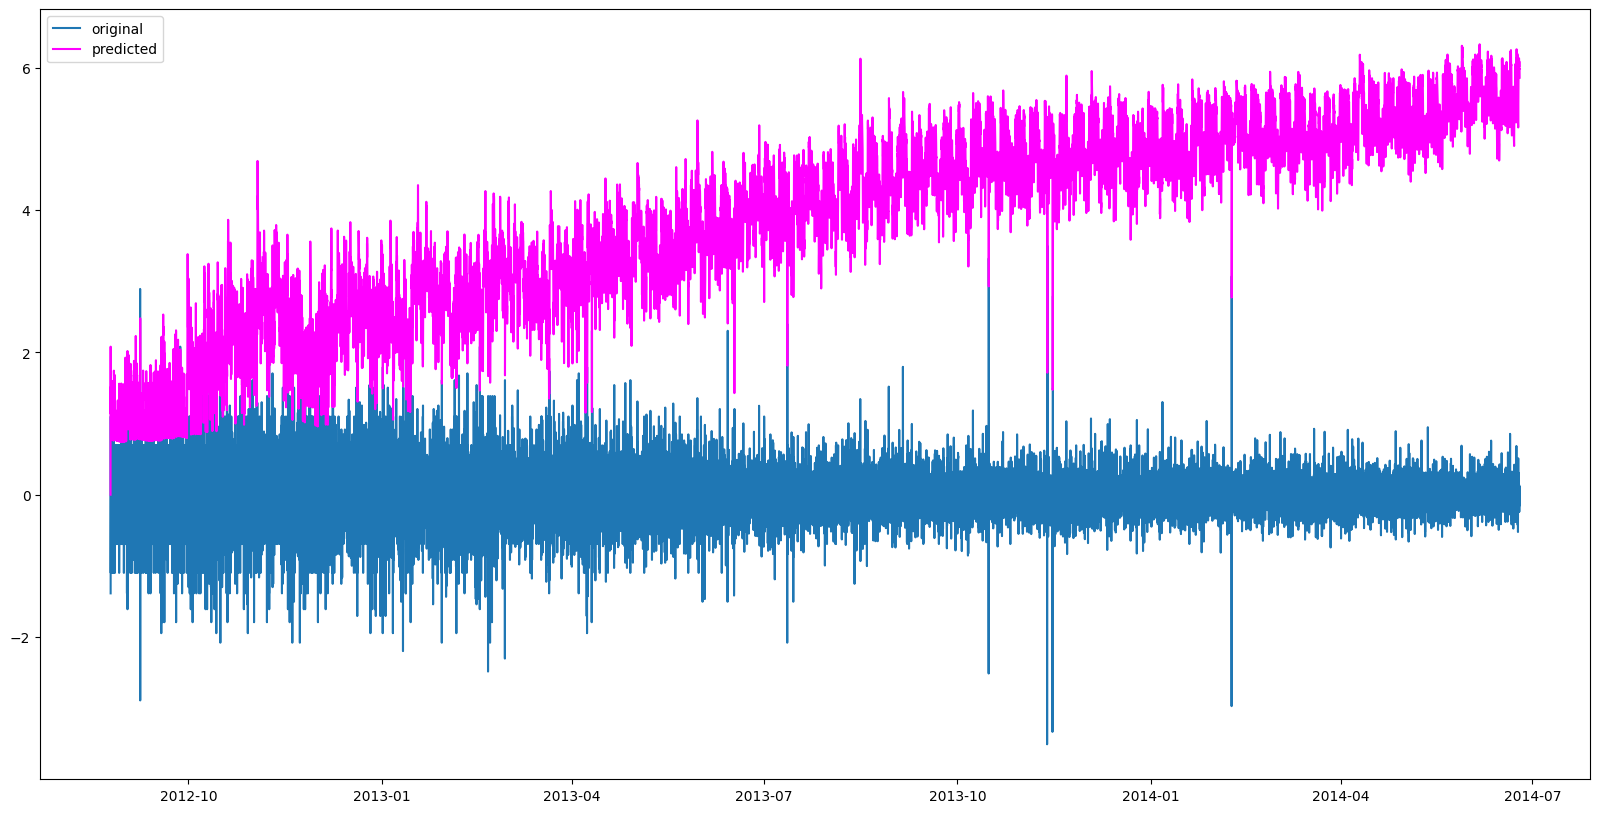

In [48]:
#ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

model2 = ARIMA(Train_log, order=(2,2,2))
results2 = model.fit()
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results2.fittedvalues, color='magenta', label='predicted')
plt.legend(loc='best')
plt.show()

C:\Users\Swetha Pooduru\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Swetha Pooduru\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Swetha Pooduru\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


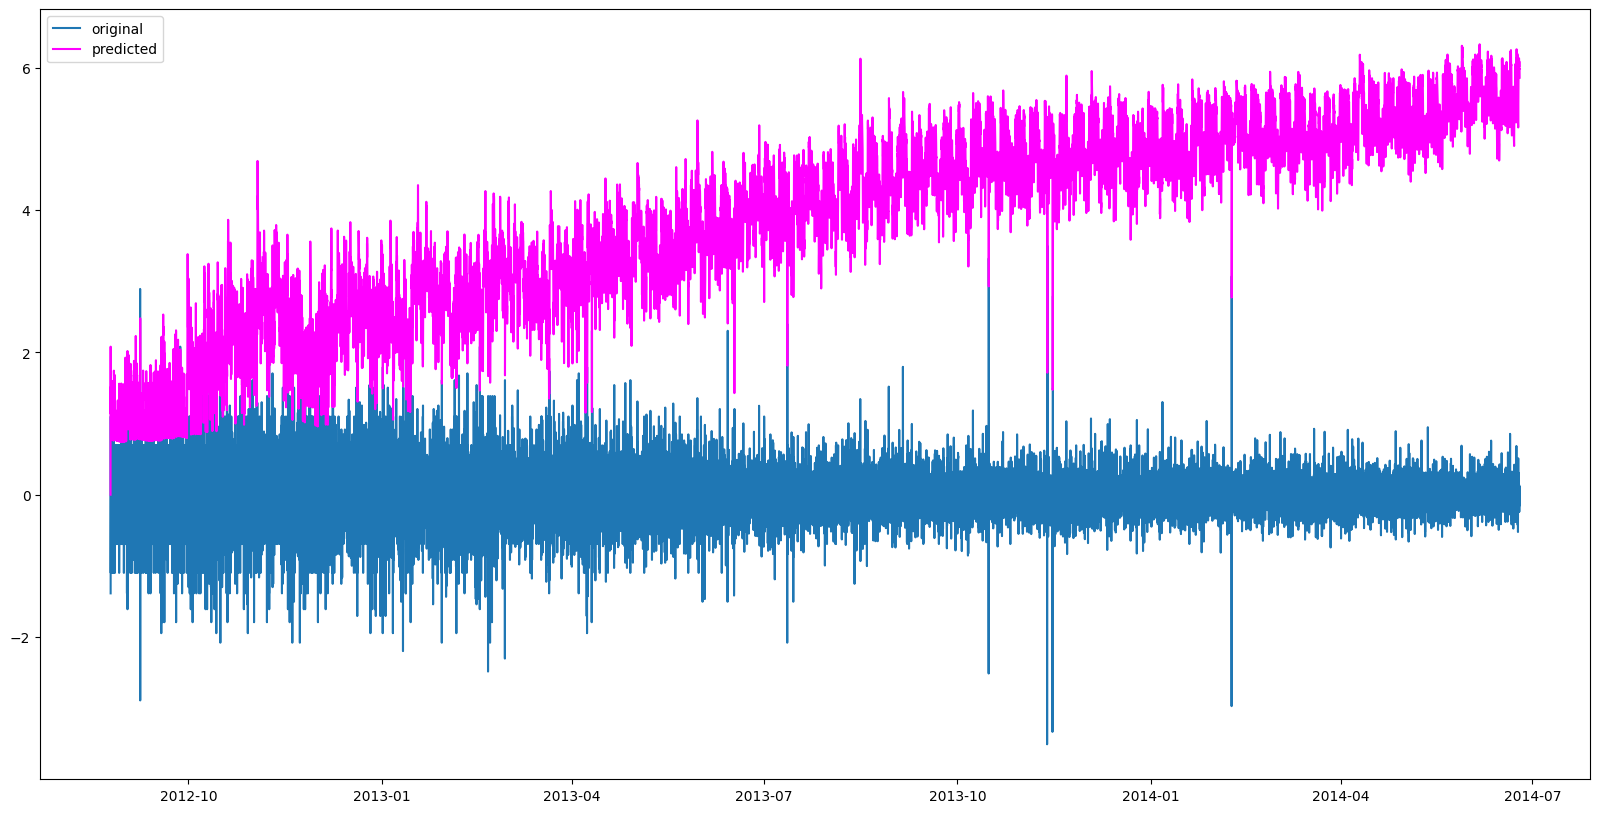

In [51]:
#ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

model3 = ARIMA(Train_log, order=(3,10,3))
results3 = model.fit()
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results3.fittedvalues, color='magenta', label='predicted')
plt.legend(loc='best')
plt.show()

# SARIMAX Model

C:\Users\Swetha Pooduru\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Swetha Pooduru\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


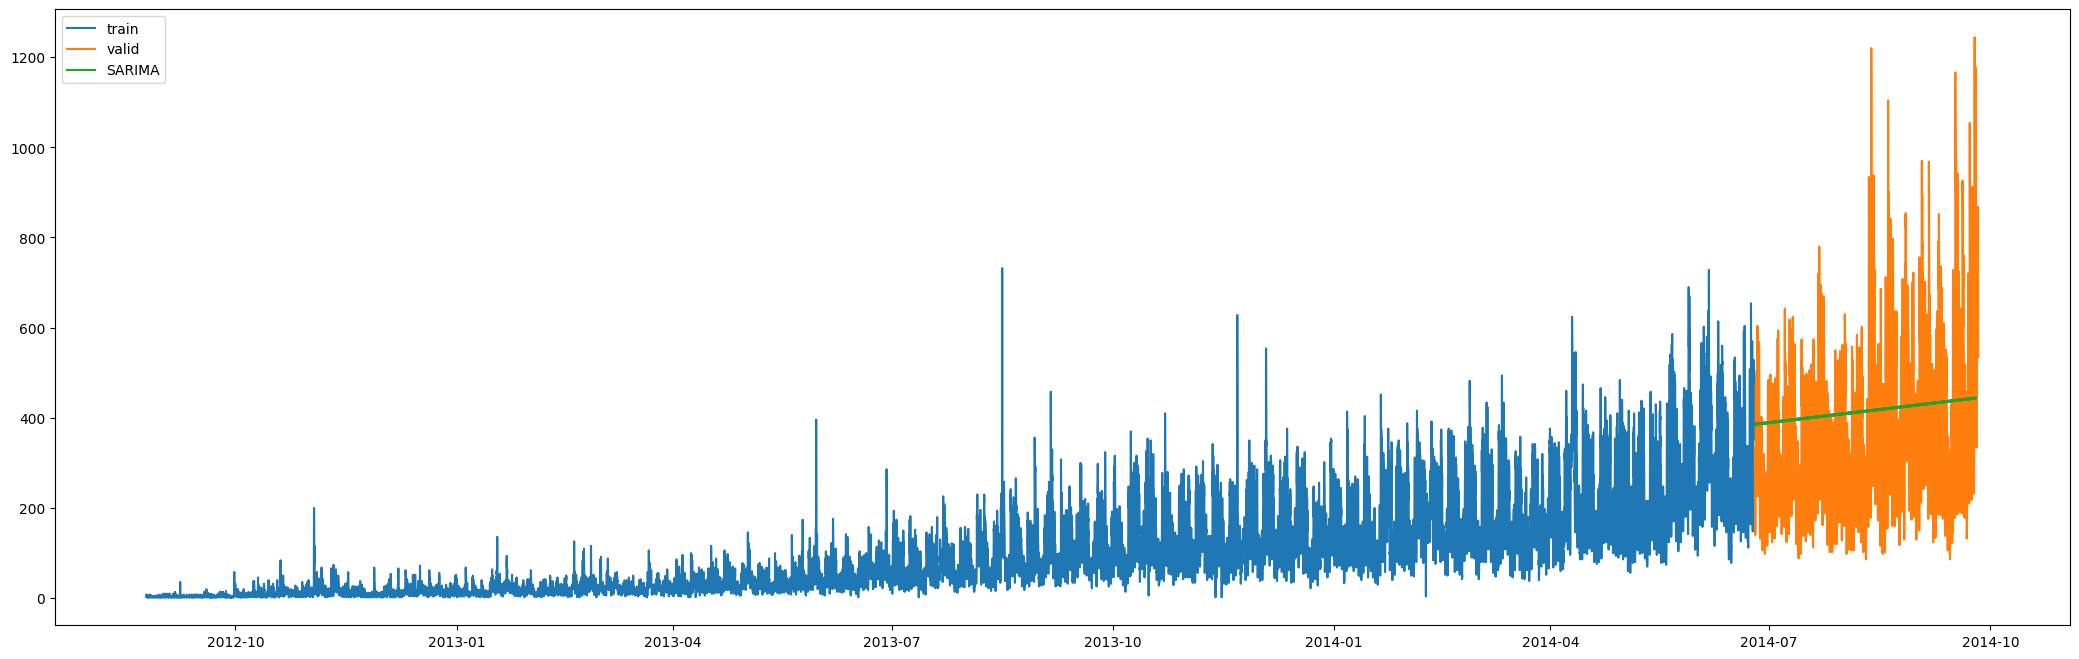

In [54]:
import statsmodels.api as sm

y_hat_avg = valid.copy()
fit1 = sm.tsa.statespace.SARIMAX(Train.Count, order=(2,1,4), seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start='2014-6-25',end='2014-9-25',dynamic=True)
plt.figure(figsize=(26,8))
plt.plot(Train['Count'],label='train')
plt.plot(valid['Count'],label='valid')
plt.plot(y_hat_avg['SARIMA'],label='SARIMA')
plt.legend(loc='best')
plt.show()